# Linear Regression練習
* 資料來源: http://openclassroom.stanford.edu/MainFolder/DocumentPage.php?course=MachineLearning&doc=exercises/ex2/ex2.html

In [1]:
%pylab inline
import theano
import theano.tensor as T
import itertools as it

Populating the interactive namespace from numpy and matplotlib


## make batch function

In [2]:
def floatX(X):
    return np.asarray(X, dtype=theano.config.floatX)

### make batches
def mk_batches(x_data, y_data, batch_size, shuffle=False):
    x_batch = list()
    y_batch = list()
    
    x_data_size = x_data.shape[0]
    y_data_size = y_data.shape[0]
    assert x_data_size == y_data_size , 'the x, y dimension is error'
    
    if shuffle:
        indices = np.arange(x_data_size)
        np.random.shuffle(indices)
    
    #range(start, stop, step)
    for start_idx in range(0, x_data_size, batch_size):
        if shuffle:
            idx = indices[start_idx : start_idx + batch_size]            
        else:
            idx = slice(start_idx, start_idx + batch_size)
            
        x_batch.append(x_data[idx])
        y_batch.append(y_data[idx])
    
    return x_batch, y_batch

## ex2Data先上傳jupyter，才能load進來

In [3]:
batch_size = 10
x_data = floatX(np.loadtxt('.\ex2x.dat'))
y_data = floatX(np.loadtxt('.\ex2y.dat'))

## 初始化權重

In [4]:
### params / init weights
w = theano.shared(floatX(np.random.randn(1))[0])
b = theano.shared(floatX(np.random.randn(1))[0])

## 定義model

In [5]:
### model
x = T.vector()
y = w*x + b

# 用神經元概念來圖解model
![alt tag](https://github.com/JiaMauJian/gradient-descent/blob/master/nb_img/model1.png?raw=true)

## 定義cost

In [6]:
### cost/error/loss
y_hat = T.vector()
cost = T.mean((y-y_hat)**2)

## 定義gradient

In [7]:
### gradients
def gd(params, grads, lr):
    updates = []
    for p, g in it.izip(params, grads):      
        updates.append([p, p - lr*g])
    return updates
    
dw, db = T.grad(cost, [w, b])
train = theano.function(inputs=[x, y_hat],
                        outputs=[cost, w, b],
                        updates=gd([w, b], [dw, db], 0.01))

## 開始訓練 (update parameters by mini-batch)

In [8]:
costs = []
epochs = 1000

for t in range(epochs): 
        all_cost = 0       
        x_batches, y_batches = mk_batches(x_data, y_data, batch_size, True)        
        batch_num = len(x_batches)
        for i in range(batch_num):        
            results = train(x_batches[i], y_batches[i])
            #print 'cost=%f, weight=%f' % (results[0], results[1])        
            costs.append(results[0])
            all_cost += results[0]
        
        print 'batch avg cost=%.5f%%' % (all_cost/batch_num)        

print 'w=%f, b=%f' % (results[1], results[2])

batch avg cost=1.17858%
batch avg cost=0.02956%
batch avg cost=0.03006%
batch avg cost=0.02876%
batch avg cost=0.02911%
batch avg cost=0.02952%
batch avg cost=0.02760%
batch avg cost=0.02633%
batch avg cost=0.02551%
batch avg cost=0.02752%
batch avg cost=0.02698%
batch avg cost=0.02586%
batch avg cost=0.02570%
batch avg cost=0.02408%
batch avg cost=0.02378%
batch avg cost=0.02314%
batch avg cost=0.02203%
batch avg cost=0.02170%
batch avg cost=0.02447%
batch avg cost=0.02317%
batch avg cost=0.02156%
batch avg cost=0.02063%
batch avg cost=0.02134%
batch avg cost=0.01926%
batch avg cost=0.02063%
batch avg cost=0.01926%
batch avg cost=0.02105%
batch avg cost=0.01866%
batch avg cost=0.01775%
batch avg cost=0.01740%
batch avg cost=0.01705%
batch avg cost=0.01647%
batch avg cost=0.01634%
batch avg cost=0.01738%
batch avg cost=0.01638%
batch avg cost=0.01565%
batch avg cost=0.01608%
batch avg cost=0.01472%
batch avg cost=0.01452%
batch avg cost=0.01481%
batch avg cost=0.01543%
batch avg cost=0

## 若用closed-form求解 (w = 0.0639, b = 0.7502) [最佳解]
## 而我們實際訓練出來的是 (w=0.062956, b=0.749841) [很接近答案]

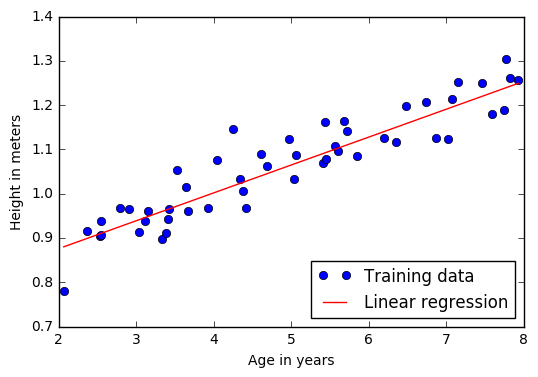

In [9]:
w = results[1]
b = results[2]

p1, = plt.plot(x_data, y_data, 'o', label='Training data')
p2, = plt.plot(x_data, w*x_data + b, 'r-', label='Linear regression')
plt.legend(handles=[p1, p2], loc=4)
plt.xlabel("Age in years")
plt.ylabel("Height in meters")
plt.show()